Accuracy Score: 0.95
Recall Score: 0.93
Precision Score: 0.88


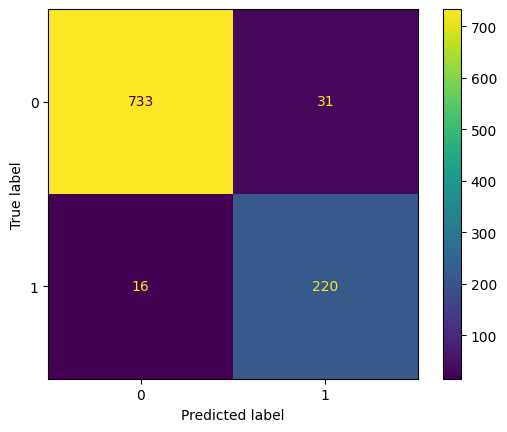




              precision    recall  f1-score   support

           0       0.98      0.96      0.97       764
           1       0.88      0.93      0.90       236

    accuracy                           0.95      1000
   macro avg       0.93      0.95      0.94      1000
weighted avg       0.95      0.95      0.95      1000



['saved model.joblib']

In [1]:
#Import data
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from joblib import dump

database = pd.read_csv("data.csv")

#set data frame to display the table
pd.DataFrame(database)

#declare x,y
target = "Loan Approval"
y = database[target]
x = database.drop(columns=[target,"Gender","Age"], axis = 1)

#since GaussianNB takes only binary, convert the strings inside the database to binary
x = pd.get_dummies(x)

#split machine
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, train_size=.8, random_state = 100)

#train model using naive bayes 
model = GaussianNB()
model.fit(x_train,y_train)

#predict if the customer eligble for loans
y_predict = model.predict(x_test)

#print accuracy and other reports
accuracy_score = accuracy_score(y_test,y_predict)
recall_score = recall_score(y_test,y_predict, average= "binary")
precision_score = precision_score(y_test,y_predict,average= "binary")
print(f"Accuracy Score: {accuracy_score:.2f}")
print(f"Recall Score: {recall_score:.2f}")
print(f"Precision Score: {precision_score:.2f}")


cm = confusion_matrix(y_true=y_test, y_pred = y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print("\n\n")
# Print classification report (Full report)
print(classification_report(y_test, y_predict))

dump(model,'saved model.joblib') #save the training model and the knoweldge gained for future usage